# Titanic Dataset


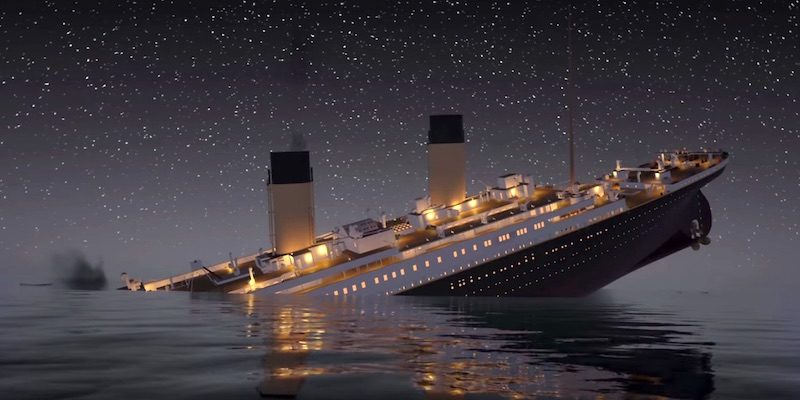

Neural networks are not just great at images, they can handle all kinds of data. An alternative way to think of them are as *universal function approximators*, because they can take any kind of data and approximate a prediction.

They're not magic though (yet) so we still need to make sure the data is in the correct format for the neural network to use.

We found this dataset on <a href="https://www.kaggle.com/c/titanic">kaggle.com</a>.

### Data Dictionary

**Variable	Definition	Key**
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
- Variable Notes

**pclass: A proxy for socio-economic status (SES)**
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1

**sibsp: The dataset defines family relations in this way...**
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch: The dataset defines family relations in this way...**
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Let's get started

First thing we need to do is import our dataset from the downloaded csv files. We're going to be using the Pandas library for this because it will store it in a formatted dataframe (similar to the format of the spreadsheet itself).

Pandas can do some really impressive stuff as we'll see further down to help us manipulate our data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

data_loc = "data/titanic/"
titanic = pd.read_csv(data_loc + "titanic.csv")

titanic.head()

## Raw information
It can be really helpful to get an idea of what our data looks like before we start messing with it. Above you can see the first 5 rows using *.head()* on our dataframe. Below we can see further details of each column (such as the min and max value) using *.describe()*

In [ ]:
titanic.describe()

## Formatting the data
In the following sections each column that is relevant to our prediction will have its own function. These functions are designed to convert that column into something usable by the neural network.

### Filter sex
Let's start with sex. At the moment our dataset contains a string with either 'male' or 'female' in it but our neural network doesn't know what to do with a string, so we need to be able to represent this information with numbers.

An easy solution is to convert 'male' to 1, and female to 0. Using pandas series datatype, we can create what is essentially an array. Then we add a conditional using number which looks at each value in the column df.Sex and converts it to 1 if it is 'male' and 0 if it is not 'male'.

Then we return this series to use later

In [ ]:
# Convert sex to a binary value of either 1 for male or 0 for female
def filter_sex(df):
    sex_series = pd.Series( np.where( df.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
    return sex_series

In [ ]:
print(filter_sex(titanic).head())

### Filter age and fare
In the following two sections we have a different problem. Some of our data is missing! We can't input nothing to our network so we're going to have to fill in the blanks with something.

Fortunately, a pandas dataframe has this nifty function *fillna* where we can fill in every entry in a column with a value.

As a simple solution, let's just add the average age and fare for these values. There's better ways to estimate this field but for now this will do.

In [ ]:
# Fill missing values of Age with the average of Age (mean)
def filter_age(df):
    age_df = pd.DataFrame() # Create a new dataframe to store our results
    age_df[ 'Age' ] = df.Age.fillna(df.Age.mean())
    return age_df

In [ ]:
print(filter_age(titanic).head())

In [ ]:
# Fill missing values of fare with the average of the fare (mean)
def filter_fare(df):
    fare_df = pd.DataFrame() # Create a new dataframe to store our results
    fare_df['fare'] = df.Fare.fillna(df.Fare.mean())
    return fare_df

In [ ]:
print(filter_fare(titanic).head())

### Filter Title
Now we've got something a little more challenging. From the name field we want to have a way to pull out the persons title and represent it in a way that the neural network can understand. Does the captain really go down with the ship?

We're going to do this using a **one-hot encoding**. A one-hot encoding helps deal with categorical data by adding multiple columns for each possible category, and adding a value of 1 to the relevant column. For example:

categories are **[apple, bannana, pear]**

our data is **[bannana, pear, grape, apple, pear]**

then a one-hot encoding would look like so:
**[[0,1,0],[0,0,1],[0,0,0],[1,0,0],[0,0,1]]**

For each data point we've converted it into an array the same size as our categories, and then added a '1' to the correct column.

We also want to simplify our data for this task so we're going to create a dictionary object that merges certain titles to mean the same thing. Such as **Capt** and **Col** are both converted to **Officer**

We can do this with titles like so:

In [ ]:
def filter_title(df):
    title_df = df[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )

    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }

    # we map each title
    title_df = title_df.map( Title_Dictionary )
    title_df = pd.get_dummies( title_df )
    return title_df

In [ ]:
print(filter_title(titanic).head())

### Filter Cabin
Here we use a similar technique for one-hot encoding. Additionally, we also fill in the blanks with an extra column to represent unknown cabins (since we can't just average the cabin rooms)

In [ ]:
def filter_cabin(df):
    cabin_df = pd.DataFrame()

    # replacing missing cabins with U (for Uknown)
    cabin_df[ 'Cabin' ] = df.Cabin.fillna( 'U' )

    # mapping each Cabin value with the cabin letter
    cabin_df[ 'Cabin' ] = cabin_df[ 'Cabin' ].map( lambda c : c[0] )

    # dummy encoding ...
    cabin_df = pd.get_dummies( cabin_df['Cabin'] , prefix = 'Cabin' )
    return cabin_df

In [ ]:
print(filter_cabin(titanic).head())

### Filter Ticket
Same thing again except we add an extra function to clean the ticket string.

In [ ]:
def clean_ticket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

def filter_ticket(df):
    ticket_df = pd.DataFrame()

    # Extracting dummy variables from tickets:
    ticket_df[ 'Ticket' ] = df[ 'Ticket' ].map( clean_ticket )
    ticket_df = pd.get_dummies( ticket_df[ 'Ticket' ] , prefix = 'Ticket' )
    return ticket_df

In [ ]:
print(filter_ticket(titanic).head())

### Filter Family
In some cases we can even add brand new features for our neural network. This is a type of feature augmentation where we take existing data and make some alterations to it to form new data.

Here we can determine the family size by combining the parch (parents) and sibsp (siblings). We then create a one-hot encoding of the size of the family

In [ ]:
def filter_family(df):
    family_df = pd.DataFrame()

    # introducing a new feature : the size of families (including the passenger)
    family_df[ 'FamilySize' ] = df[ 'Parch' ] + df[ 'SibSp' ] + 1

    # introducing other features based on the family size
    family_df[ 'Family_Single' ] = family_df[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
    family_df[ 'Family_Small' ]  = family_df[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
    family_df[ 'Family_Large' ]  = family_df[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )
    return family_df

In [ ]:
print(filter_family(titanic).head())

### Filter Everything!
Now that all those functions are complete we can mash it all together in one big dataframe. This function takes the raw data and sends it to each function. Then uses a concatanation function to combine it all together in one big dataset.

We return Data_x (our features) and data_y (our labels if the person survived or not)

In [ ]:
# Now mash it all together into one big dataframe
def format_data(df):
    sex_series = filter_sex(df)
    age_df = filter_age(df)
    fare_df = filter_fare(df)
    title_df = filter_title(df)
    cabin_df = filter_cabin(df)
    ticket_df = filter_ticket(df)
    family_df = filter_family(df)
    
    ticket_df.reset_index()
    family_df.reset_index()
    
    x_data = pd.concat( [age_df, fare_df, title_df, cabin_df, ticket_df, family_df, sex_series ] , axis=1 )

    if 'Survived' in df:
        y_data = df.Survived
    else:
        y_data = None
    return x_data, y_data

In [ ]:
print(format_data(titanic)[0].head())

# Send it to a Neural Network
Below is a basic implementation of a one layer neural network. It is purposefully very basic so that you can expand and improve it with the challenge below.

All details of how this part works can be found in the MNIST_digit_recognition file.

One thing to note is that we now send our titanic dataframe to the format_data function we created above. Then use a train_test_split from sklearn in order to split the data.

In [ ]:
import tensorflow as tf

data_x, data_y = format_data(titanic)
train_x , test_x , train_y , test_y = train_test_split( data_x , data_y , train_size = .8 )

learning_rate = 0.001
epochs = 500

input_nodes = 53
output_nodes = 1
batch_size = 10

x = tf.placeholder('float', [None, input_nodes])
y = tf.placeholder('float', [None, output_nodes])

hidden_1_nodes = 100

hlw_1 = tf.Variable(tf.random_normal([input_nodes, hidden_1_nodes])) # The weights of the first hidden layer
hlb_1 = tf.Variable(tf.random_normal([hidden_1_nodes])) # The biases of the first hidden layer

outw = tf.Variable(tf.random_normal([hidden_1_nodes, output_nodes])) # The weights of the output layer
outb = tf.Variable(tf.random_normal([output_nodes])) # The biases of the output layer

In [ ]:
def forward_propagation(x):
    hlout_1 = tf.nn.sigmoid(tf.matmul(x, hlw_1) + hlb_1) # input multiplied by hidden layer 1 weights. Add bias. Apply sigmoid
    output = tf.nn.sigmoid(tf.matmul(hlout_1, outw) + outb) # hidden layer 2 output multiplied by output layer weights. add bias. DON'T add sigmoid
    return output

In [ ]:
def backward_propagation(y_, y, learning_rate):
    cost = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits(logits=y_, labels=y)) #Error/loss function. Cost is the total error over the batch
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost) #Adam optimizer is a type of gradient descent. We want it to use the learning rate and minimize that cost
    return optimizer, cost

In [ ]:
def calculate_accuracy(y_, y):
    correct = tf.equal(tf.round(y_), tf.round(y)) # argmax finds the index of the largest value in a tensor. So we're comparing the two using tf.equal
    accuracy = tf.reduce_mean(tf.cast(correct, 'float')) # We've got a tensor of true and false statements now. Let's find the average amount
    return accuracy, correct

In [ ]:
y_ = forward_propagation(x)
optimizer, cost = backward_propagation(y_, y, learning_rate)
accuracy = calculate_accuracy(y_, y)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_per_epoch = [] 
accuracy_per_epoch = []

# Loop over the dataset 'epochs' amount of times
epoch_cost = 0
for epoch in range(epochs):
    # Go through the dataset in batches
    for i in range(int(len(train_x)/batch_size)):
        batch_x = train_x[i*batch_size:i*batch_size + batch_size]
        batch_y = train_y[i*batch_size:i*batch_size + batch_size]
        
        batch_x = np.reshape(batch_x, [len(batch_x), input_nodes])
        batch_y = np.reshape(batch_y, [len(batch_y), output_nodes])
        
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y}) # Run our forward prop and backward prop over this batch of training data
        epoch_cost += c
    if (epoch != 0 and (epoch+1) % 100 == 0 or epoch+1 == epochs):
        # Test the accuracy of our model against the training set
        epoch_accuracy, _ = sess.run(accuracy, feed_dict={x: np.reshape(train_x, [len(train_x), input_nodes]), y: np.reshape(train_y, [len(train_y), output_nodes])}) # Pass all the labels through to calculate accuracy
        print('Epoch', epoch+1, 'completed out of', epochs, '\ncost:', epoch_cost, '\ntraining accuracy:', epoch_accuracy, '\n')
        # Store the results of this epoch so we can make nice graphs later
        cost_per_epoch.append(epoch_cost)
        accuracy_per_epoch.append(epoch_accuracy) 
        epoch_cost = 0

In [ ]:
plt.plot(cost_per_epoch)
plt.show()
print("Cost each 100 iterations")
plt.plot(accuracy_per_epoch)
plt.show()
print("Accuracy each 100 iteration")

In [ ]:
(test_accuracy, test_correct_list), outputs = sess.run([accuracy, y_], feed_dict={x: np.reshape(test_x, [len(test_x), input_nodes]), y: np.reshape(test_y, [len(test_y), output_nodes])})
print("training accuracy:", accuracy_per_epoch[-1])
print("testing accuracy:", test_accuracy)

## Single value prediction
These two functions setup one row of data and runs a prediction of it

In [ ]:
titanic_formatted, _ = format_data(titanic)
titanic_columns = titanic_formatted.columns.get_values()

def predict_passenger_outcome(passenger):
    data = pd.DataFrame(data=[passenger])
    data, _ = format_data(data)
    data = pd.DataFrame(columns=titanic_columns, data=data)
    data = data.fillna(0)
   
    data = np.reshape(data, [len(data), input_nodes])
    result = sess.run(y_, feed_dict={x: data})
    return passenger['Name'] + " survival chance: " +  str('{:0.2f}'.format(result[0][0]*100)) + "%"

def setup_passenger(Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked):
    from random import randint
    passenger = {
        'PassengerId':randint(0, 99999),
        'Pclass':Pclass,
        'Name':Name,
        'Sex':Sex,
        'Age':Age,
        'SibSp':SibSp,
        'Parch':Parch,
        'Ticket':Ticket,
        'Fare': Fare,
        'Cabin': Cabin,
        'Embarked':Embarked
    }
    
    
    return passenger

In [ ]:
jack = setup_passenger(3, 'Dawson, Mr. Jack', 'male', 20.0, 1, 0, 'PC 17599', 7.500, 'D85', 'C')
rose = setup_passenger(1, 'Bukater, Miss. Rose Dewitt', 'female', 19.0, 1, 0, 'PC 17599', 71.2833, 'A85', 'A')

print(predict_passenger_outcome(jack))
print(predict_passenger_outcome(rose))



There was a small chance for Jack to survive after all! If only Rose would <a href="https://www.thesun.co.uk/archives/news/550649/3d-titanic-reveals-rose-did-have-room-for-jack-on-that-door/">scooch over a bit</a> 

*Absolutely no research was done on the characters to make sure the above details are correct. I've seen Titanic once and I'm not prepared to endure that rollercoaster of emotions again*

## Morbid curiosity 
Ever wanted to know if you would have survived the Titanic? Well good news! Now you (sort of) can!

Enter your details below. You'll have to guestimate your ticket price and cabin location.

In [ ]:
# Enter your own details (or your best guess) and see if you're a Jack or a Rose (dead or alive)
you = setup_passenger(Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked)

print(predict_passenger_outcome(you))

# Challenge
The above code was purposely left in a basic state. There's a lot of work that can be done to improve this network on both the data manipulation side and neural network side.

Here's a few ideas of ways you can improve the network:

**Normalization**: Networks work best when the values entered are in a consistent format. This allows the weights to remain consistent and produces more stable results. Normalizing the data is taking a column and reducing the all values between a certain range. For instance, it may help to convert the ticket fare price and age to a value between 1 and 0. Check out numpys function <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html">numpy.linalg.norm</a>

**Fill in the blanks better**: At the moment we're either entering in the average or creating another category. This is fine but what if we were smarter about it? Why not average the age or fare based on what title the person has? An assumption can be made that people with higher titles tend to be older.

**Add more layers**: When in doubt, add more layers. It very rarely hurts the networks performance.

**Change the learning rate**: Play around with the learning rate to see if there are any improvements when you increase or decrease the value.

**Change the epochs**: Who knows, maybe training for longer will improve the network?

**Alter the training/test split**: The function train_test_split takes a train_size parameter. It's currently set to have 80% of the data be training and 20% of the data to be testing. Maybe a different split would work better?

**Experiment**: Play around with it! There's always plenty of things that can be done